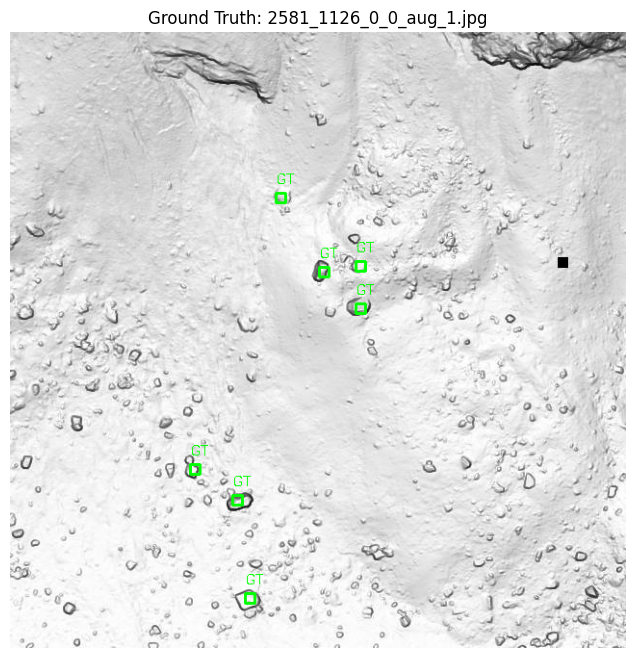

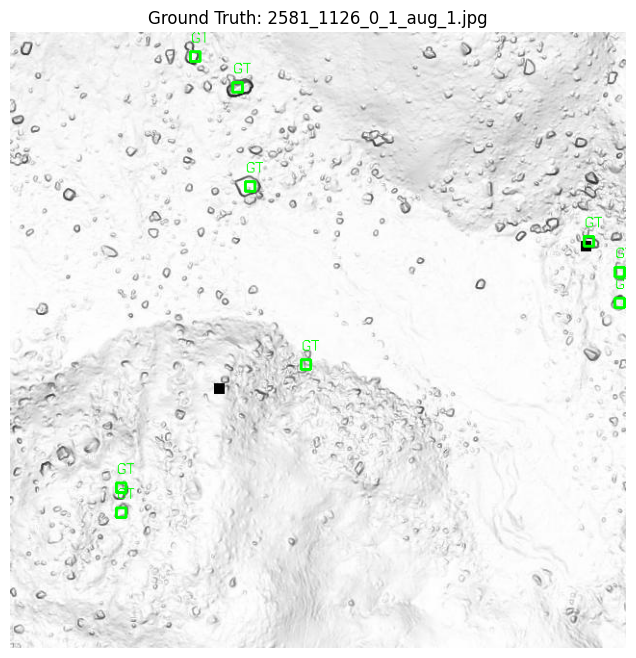

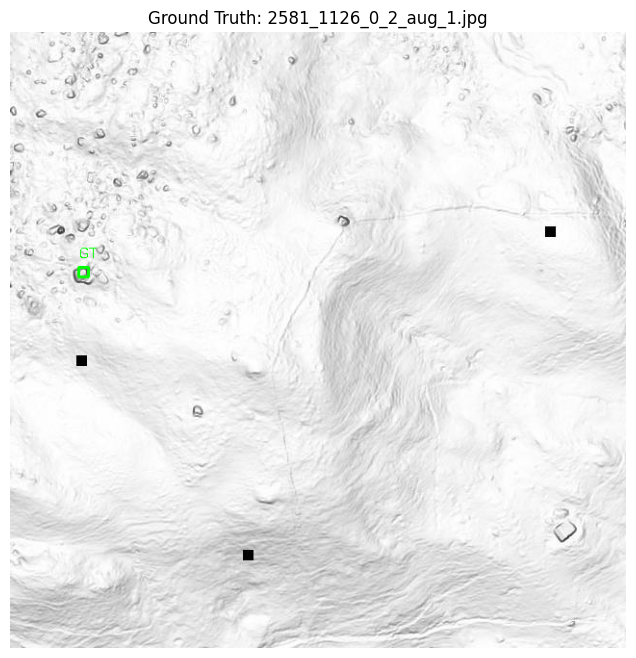

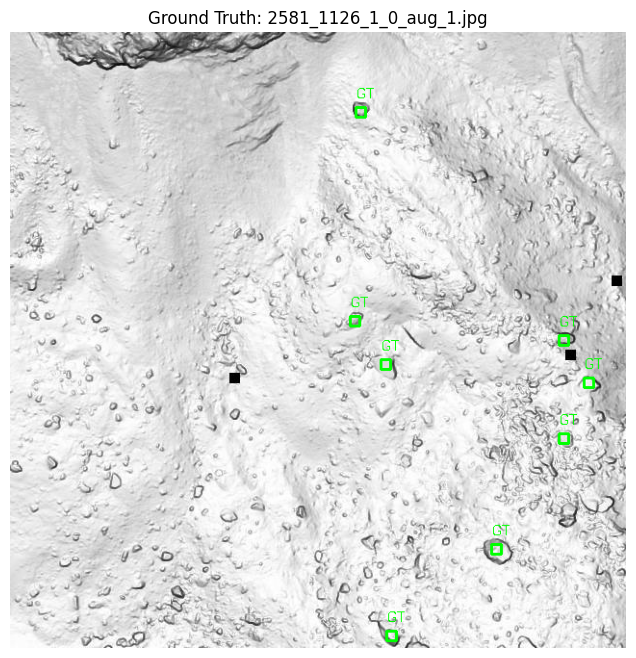

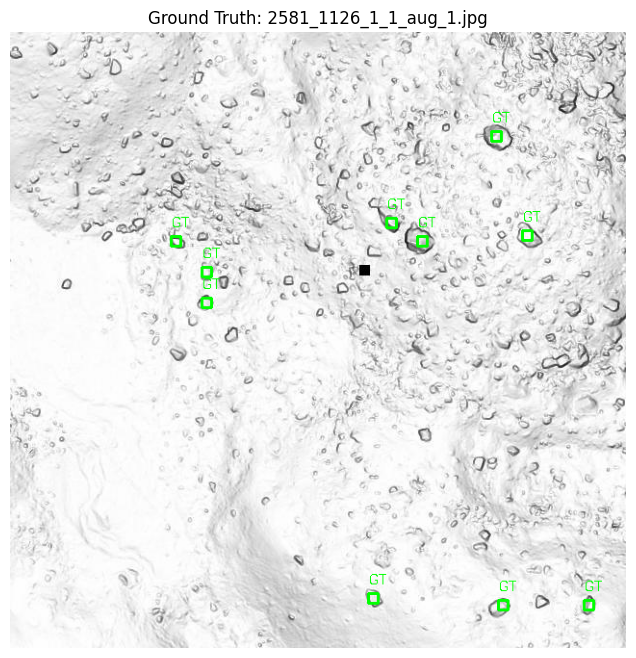

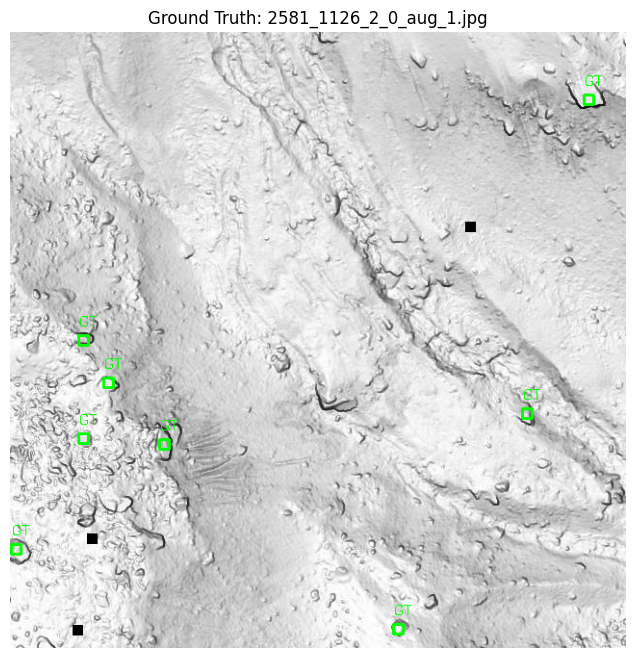

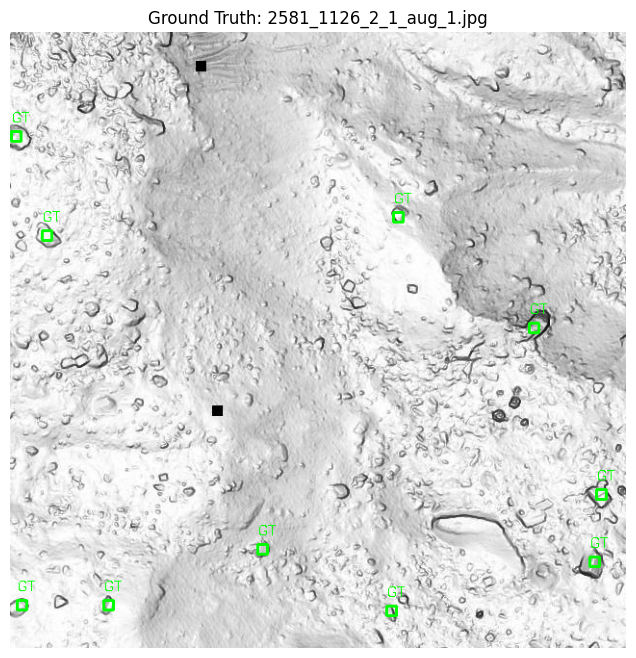

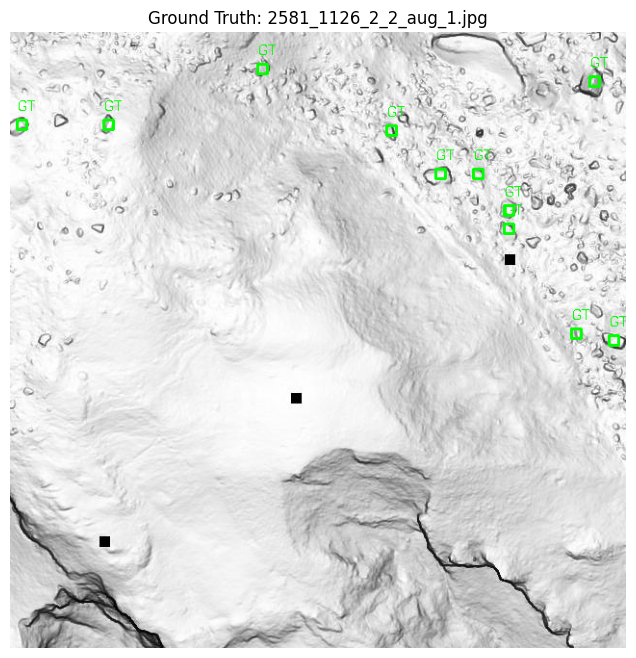

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
train_images = 'dataset_surface_hillshade/augmented_train_images_obst'
yolo_labels = 'dataset_surface_hillshade/augmented_train_labels_obst'

# Helper function to load YOLO labels
def load_yolo_labels(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    return [list(map(float, line.strip().split())) for line in lines]

# Helper function to draw bounding boxes
def draw_boxes(image, boxes, color, label_type=""):
    h, w, _ = image.shape  # Image dimensions (height, width)
    for box in boxes:
        x_center, y_center, box_width, box_height = box[1:5]  # YOLO format
        # Convert normalized coordinates to pixel values
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)
        
        # Draw the rectangle and label
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        if label_type:
            cv2.putText(image, f"{label_type}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Process only the first 10 label files
for idx, label_file in enumerate(os.listdir(yolo_labels)):
    if idx >= 10:  # Stop after processing 10 files
        break

    if label_file.endswith('.txt'):  # Ensure it's a label file
        label_path = os.path.join(yolo_labels, label_file)
        labels = load_yolo_labels(label_path)
        
        if len(labels) > 0:  # Check if there are any labels
            # Load the corresponding image
            image_file = label_file.replace('.txt', '.jpg')  # Assuming images are .jpg
            image_path = os.path.join(train_images, image_file)
            
            # Ensure the image exists
            if not os.path.exists(image_path):
                print(f"Image not found for label file: {label_file}")
                continue
            
            image = cv2.imread(image_path)
            if image is None:
                print(f"Failed to load image: {image_file}")
                continue
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Draw bounding boxes
            ground_truth_image = image.copy()
            draw_boxes(ground_truth_image, labels, color=(0, 255, 0), label_type="GT")  # Green for ground truth

            # Plot the image
            plt.figure(figsize=(8, 8))
            plt.imshow(ground_truth_image)
            plt.title(f"Ground Truth: {image_file}")
            plt.axis('off')
            plt.show()
